# Consumo de materia prima

Uno de los principales problemas de las operaciones son los problemas derivados del retraso en la producción y entregas tardias lo cual a muchos clientes los desalienta a comprar volumenes más grandes. Los retrasos en producción pueden reducirse considerando la materia prima necesaria desde antes para solicitarla con anticipación y agilizar el tiempo de entrega.

Con la información que tenemos en este momento, es posible visualizar el consumo en m2 requerido en cada mes para identificar tendencias y tomar precauciones en inventario.

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importamos los archivos csv originales

df = pd.read_csv('material.csv')
columns = pd.read_csv('columns.csv')
df.columns

Index(['Unnamed: 0', 'foliointerno', '_id', 'Usuario.razonSocial',
       'Productos.idLocal', 'Productos.unidades', 'Productos.cantidad',
       'Productos.importe', 'Especificaciones.estructura',
       'Especificaciones.tipo', 'Especificaciones.calibreECT',
       'Especificaciones.caraExterior', 'Especificaciones.largo',
       'Especificaciones.ancho', 'Especificaciones.alto',
       'Especificaciones.tipoUnion', 'Especificaciones.suaje',
       'Productos.precioUnitario', 'precios.precioGeneralm2', 'fechaEmision',
       'Especificaciones.longitudLamina', 'Especificaciones.anchoLamina',
       'areaM2', 'precioListaMillares'],
      dtype='object')

In [4]:
# Para poder utilizar la columna 'fechaEmision' como un indice debemos convertirla a un formato de fecha

df['fechaEmision'] = pd.to_datetime(df['fechaEmision'])

La agrupación debe considerar el calibre ya con base a la especificación se compra la lamina de material

In [5]:
# Realizamos la agrupación por usuario y especificación sumando la cantidad total en m2  el mes y año en cada registro


df['fechaEmision'] = pd.to_datetime(df['fechaEmision'])
ventasCliente = df.groupby([df['fechaEmision'].dt.year, 'Especificaciones.calibreECT',df['fechaEmision'].dt.month])['areaM2'].sum()
ventasCliente

fechaEmision  Especificaciones.calibreECT  fechaEmision
2017          26                           10              0.336400
                                           11              0.336400
                                           12              0.672800
              32                           9               3.015140
                                           10              2.867271
                                                             ...   
2020          36                           1               4.677308
                                           2               2.226480
                                           9               1.379548
                                           10              2.728541
              38                           10              0.971750
Name: areaM2, Length: 92, dtype: float64

In [6]:
# Desapilamos el dataframe con el metodo .unstack() para visualizar el material suministrado por año por cliente 
# convirtiendo los NaN resultado de productos no comprados por los clientes en 0

ventasClienteTotal = ventasCliente.unstack(1).fillna(0)
ventasClienteTotal


Especificaciones.calibreECT        23        26        29         32  \
fechaEmision fechaEmision                                              
2017         9               0.000000  0.000000  0.000000   3.015140   
             10              0.000000  0.336400  0.000000   2.867271   
             11              0.000000  0.336400  0.000000   2.867271   
             12              0.000000  0.672800  0.000000   5.734542   
2018         1               0.000000  0.336400  0.000000   2.867271   
             2               0.000000  0.336400  0.000000   2.867271   
             3               0.000000  0.672800  0.000000   8.749682   
             4               0.000000  0.336400  0.000000   2.867271   
             5               0.000000  0.672800  0.000000   5.734542   
             6               0.000000  0.336400  0.000000   2.867271   
             7               0.000000  0.672800  0.000000   5.734542   
             8               0.000000  0.336400  0.000000   2.867271   
             9               0.000000  0.672800  0.000000   8.749682   
             10              0.000000  0.336400  0.000000   2.867271   
             11              0.000000  0.672800  0.000000   5.734542   
             12              0.000000  0.336400  0.000000   2.867271   
2019         1               0.000000  0.336400  0.000000   2.867271   
             2               0.000000  0.672800  0.000000   5.734542   
             3               0.000000  0.336400  0.000000   5.882411   
             4               0.000000  0.672800  0.000000   5.734542   
             5               0.000000  0.336400  0.000000   2.867271   
             6               0.000000  0.672800  0.000000   5.734542   
             7               0.000000  0.336400  0.000000   2.867271   
             8               0.000000  0.672800  0.000000   5.734542   
             9               0.000000  0.336400  0.000000   5.882411   
             10              0.000000  0.336400  0.000000   2.867271   
             11              0.000000  0.925725  1.217059   8.426067   
             12              0.000000  0.336400  0.000000   2.867271   
2020         1               0.000000  0.672800  6.367855   8.861659   
             2               0.000000  0.336400  1.021547   4.491684   
             3               0.000000  0.672800  0.000000   8.749682   
             4               0.000000  0.336400  0.803339   2.867271   
             5               0.000000  0.672800  0.000000   5.734542   
             6               0.000000  0.336400  0.427544   8.250321   
             7               0.000000  0.925725  0.654060  25.175897   
             8               0.000000  0.336400  0.000000   9.237411   
             9               0.000000  0.336400  4.107619  23.029526   
             10              2.926139  0.672800  0.629620  23.362622   
             11              0.000000  0.000000  1.723504  33.298267   

Especificaciones.calibreECT        36       38  
fechaEmision fechaEmision                       
2017         9               0.000000  0.00000  
             10              0.000000  0.00000  
             11              0.000000  0.00000  
             12              0.000000  0.00000  
2018         1               0.000000  0.00000  
             2               0.000000  0.00000  
             3               0.000000  0.00000  
             4               0.000000  0.00000  
             5               0.000000  0.00000  
             6               0.000000  0.00000  
             7               0.000000  0.00000  
             8               0.000000  0.00000  
             9               0.000000  0.00000  
             10              0.000000  0.00000  
             11              0.000000  0.00000  
             12              0.000000  0.00000  
2019         1               0.000000  0.00000  
             2               0.000000  0.00000  
             3               0.000000  0.00000  
             4    

In [7]:
# meses

mes = {1: 'Enero', 
2: 'Febrero',
3: 'Marzo',
4: 'Abril',
5: 'Mayo',
6: 'Junio',
7: 'Julio',
8: 'Agosto',
9: 'Septiembre',
10: 'Octubre',
11: 'Noviembre',
12: 'Diciembre'}

In [8]:
# Creamos los dataframes por año para filtrar

consumo2017 = ventasClienteTotal.loc[2017].rename(index=mes)
consumo2018 = ventasClienteTotal.loc[2018].rename(index=mes)
consumo2019 = ventasClienteTotal.loc[2019].rename(index=mes)
consumo2020 = ventasClienteTotal.loc[2020].rename(index=mes)
consumo2020

Especificaciones.calibreECT,23,26,29,32,36,38
fechaEmision,,,,,,
Enero,0.000000,0.672800,6.367855,8.861659,4.677308,0.00000
Febrero,0.000000,0.336400,1.021547,4.491684,2.226480,0.00000
Marzo,0.000000,0.672800,0.000000,8.749682,0.000000,0.00000
Abril,0.000000,0.336400,0.803339,2.867271,0.000000,0.00000
Mayo,0.000000,0.672800,0.000000,5.734542,0.000000,0.00000
Junio,0.000000,0.336400,0.427544,8.250321,0.000000,0.00000
Julio,0.000000,0.925725,0.654060,25.175897,0.000000,0.00000
Agosto,0.000000,0.336400,0.000000,9.237411,0.000000,0.00000
Septiembre,0.000000,0.336400,4.107619,23.029526,1.379548,0.00000


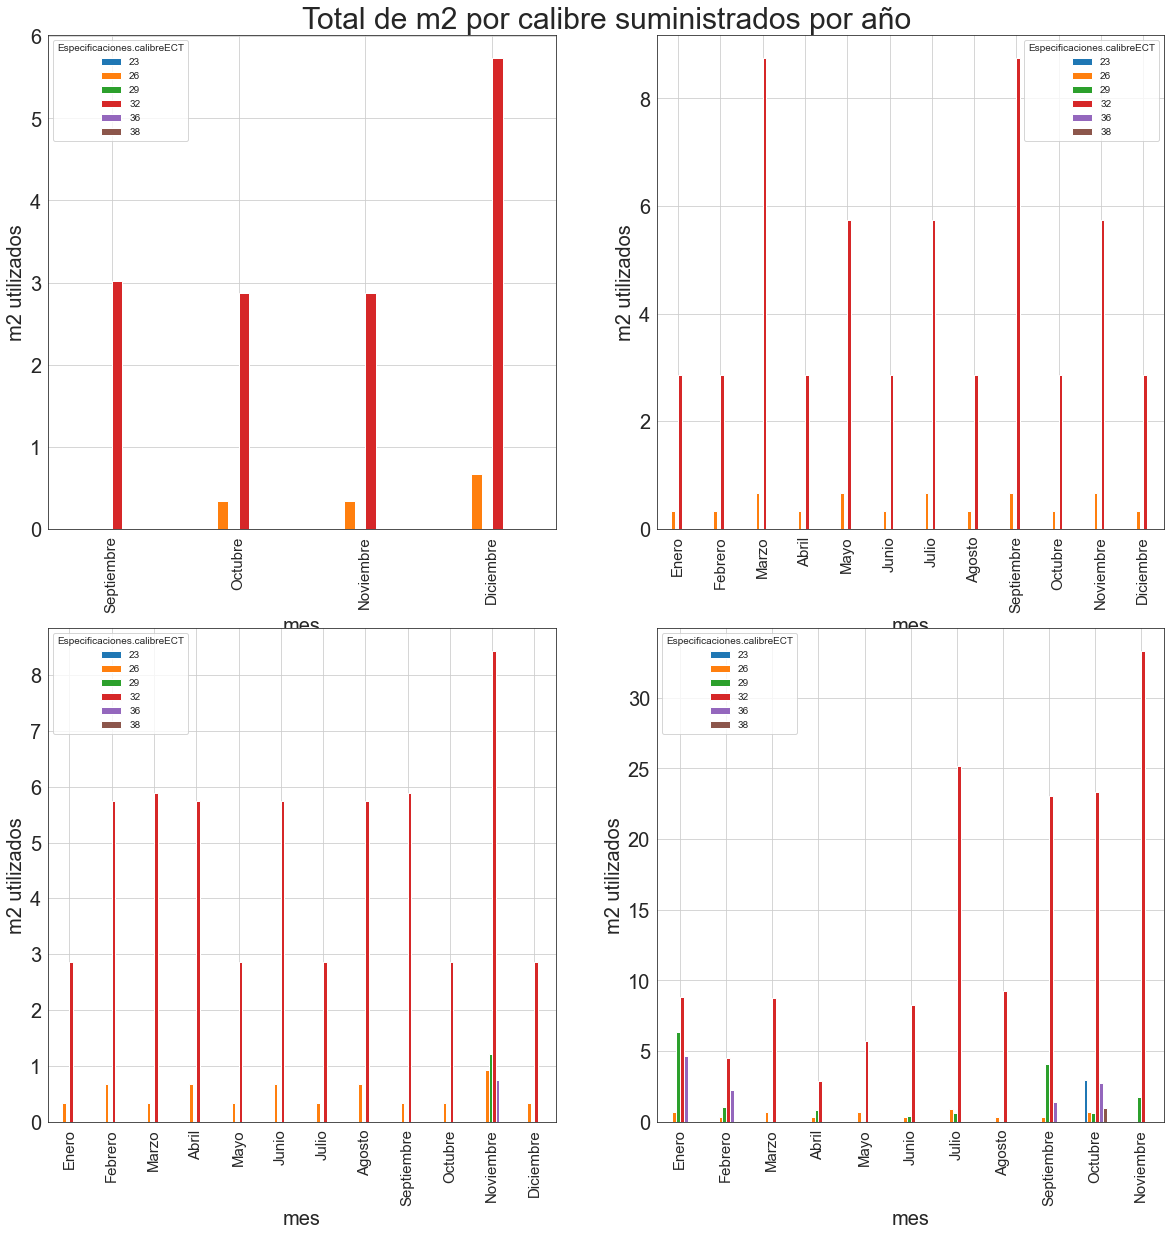

In [38]:
# Iniciamos con la construcción del grafico dividido

sns.set_style('white')
fig = plt.figure(figsize=(80, 80))
plt.title('Total de m2 por calibre suministrados por año', fontsize=30)
plt.axis('off')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=20)

# Deshabilitamos compartir axis ya que los datos son muy diferentes por la entrada de clientes nuevos y 

axes = fig.subplots(2, 2, sharex=False, sharey=False)

ax1 = consumo2017.plot(kind="bar", figsize=(20, 20), ax=axes[0, 0], grid=True)
ax2 = consumo2018.plot(kind="bar", figsize=(20, 20), ax=axes[0, 1], grid=True)
ax3 = consumo2019.plot(kind="bar", figsize=(20, 20), ax=axes[1, 0], grid=True)
ax4 = consumo2020.plot(kind="bar", figsize=(20, 20), ax=axes[1, 1], grid=True)

# Añadimos descripciones y formato
ax1.set_ylabel('m2 utilizados', fontsize=20)
ax2.set_ylabel('m2 utilizados', fontsize=20)
ax3.set_ylabel('m2 utilizados', fontsize=20)
ax4.set_ylabel('m2 utilizados', fontsize=20)

ax1.set_xlabel('mes', fontsize=20)
ax2.set_xlabel('mes', fontsize=20)
ax3.set_xlabel('mes', fontsize=20)
ax4.set_xlabel('mes', fontsize=20)


plt.savefig("../recursos/volumenxCalibre.png")

Es visible lo siguiente:

* El volumen por calibre fue incrementando y diversificado donde el aumento en la demanda es evidente. Por tres años el consumo minimo del corrugado de 32 ECT fue minimo de 3 m2 al mes mientras los otros calibres se mantuvieron por debajo de 1m2.

* Esta tendencia cambio a partir del 2020 con la entrada de nuevos clientes y aumento en las ventas donde al dia de hoy el promedio del corrugado de 32 ECT es mayor a 5 y a cuatripicado la demanda en los ultimos 3 meses. 

* Tambien en los ultimos años se puede observar un incremento en las ventas a final de año donde el inventario recomendado minimo seria de 2.5 m2.